# 1. BUSINESS UNDERSTANDING

“Like it or not, every construction company—and solutions provider—is now also in the data business. How well we help our customers transform that data into intelligence that drives better decisions to deliver projects more efficiently and more sustainably, with higher quality, lower costs and fewer risks is what defines the next frontier of construction management. Data is the key to improving the bottom line as well as protecting it. Our ability to break down data silos and transform raw data into action and intelligence is the crux to solving most challenges that rear their head in our industry. Solve the data problem and everything else falls into place.”—Jon Fingland, General Manager, Collaboration Solutions, Trimble

You have been tasked with analysing Ireland's Construction data and comparing the Irish Construction sector with other countries worldwide. This analysis should also include forecasting, sentiment analysis and evidence-based recommendations for the sector as well as a complete rationale of the entire process used to discover your findings. Your Research could include export, import, trade imbalance, house production, material stock, labour/skill pool, etc. (or any other relevant topic EXCEPT Climate change) with Ireland as your base line.
 > Use relevant data to understand the market to improve construction company services and the business itself.


# 2. Data
All the data used in this project was found in this site;("https://data.gov.ie/dataset?tags=construction")

## Preparing the tools used in this project

In [10]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import os
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

## Import relavant dataset 

### 1. Social Housing Construction Status Report 2020 
#### Social Housing Construction Status Report Q2 2020
The Construction Status Q2 2020 report shows that 8,529 homes were under construction at end Q2 2020; and some 3,160 homes had been approved and were about to go on site. The full programme listed in the report now includes 2,154 schemes (or phases), delivering 29,810 homes – a substantial increase on the 22,139 homes which were in the programme at the end of Q2 2019
Please note due to the Covid 19 Pandemic, Q1 2020 statistical returns were deferred to be collected in conjunction with Q2 2020. The Q1 Construction Status report is incorporated into the Q2 publication

#### Social Housing Construction Status Report Q3 2020
The Construction Status Q3 2020 report shows that 9,562 homes were under construction at end Q3 2020; and some 3,133 homes had been approved and were about to go on site. The full programme listed in the report now includes 2,283 schemes (or phases), delivering 31,862 homes – a substantial increase on the 22,721 homes which were in the programme at the end of Q3 201

#### Social Housing Construction Status Report Q4 2020
The Minister recently published the Construction Status Report (CSR) for Quarter 4 2020. The CSR provides scheme level detail on new build social housing activity in each local authority area.
Commenting on the report Minister O’Brien said, “The report shows a strong pipeline for new social homes with 8,555 social homes on site and over 9,000 homes at various stages of the approval process. The key priority for my Department is increasing the supply of social housing, I intend to publish our new housing plan ‘Housing for All’ later this summer. It will build on our commitments in the Programme for Government and provide a roadmap, with a whole of Government approach, to outline how we get to a housing system that gives us the sustainable supply we need, at a price that people can afford, with appropriate housing options for the most vulnerable in our society.”


In [3]:
# Set the directory containing the datasets
data_dir = 'C:/Users/OMBATI/Desktop/python codes/project money/social_housing_construction_status_report_2020'

# Get a list of all the CSV files in the directory
csv_files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]

# Initialize an empty list to store the dataframes
dfs = []

# Loop through each CSV file and read it into a dataframe
for file in csv_files:
    filepath = os.path.join(data_dir, file)
    df = pd.read_csv(filepath)
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
social_housing = pd.concat(dfs, ignore_index=True)

# Save the DataFrame to a CSV file
df.to_csv('social_housing5.csv', index=False)

# Print the firts few rows of the combined dataframe
social_housing.head()

,No,Funding Programme,LA,Scheme/Project Name,No_ of Units,Approved Housing Body,Stage 1 Capital Appraisal,Stage 2 Pre Planning,Stage 3 Pre Tender design,Stage 4 Tender Report or Final Turnkey/CALF approval,On Site,Completed,No_
0,1.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
1,2.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
2,3.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",8,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
3,4.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
4,5.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN


The  three datasets were combned into one dataset called *social_housing*

## 2. National House Construction Cost Index

(https://data.gov.ie/dataset/national-house-construction-cost-index?package_type=dataset)

The index relates to costs ruling on the first day of each month.

NATIONAL HOUSE CONSTRUCTION COST INDEX; Up until October 2006 it was known as the National House Building Index Oct 2000 data; The index since October, 2000, includes the first phase of an agreement following a review of rates of pay and grading structures for the Construction Industry and the first phase increase under the PPF.

April, May and June 2001; Figures revised in July 2001due to 2% PPF Revised Terms. March 2002; The drop in the March 2002 figure is due to a decrease in the rate of PRSI from 12% to 10¾% with effect from 1 March 2002.

The index from April 2002 excludes the one-off lump sum payment equal to 1% of basic pay on 1 April 2002 under the PPF.
April, May, June 2003; Figures revised in August'03 due to the backdated increase of 3% from 1April 2003 under the National Partnership Agreement 'Sustaining Progress'.

The increases in April and October 2006 index are due to Social Partnership Agreement "Towards 2016".
March 2011; The drop in the March 2011 figure is due to a 7.5% decrease in labour costs.
Methodology in producing the Index

Prior to October 2006:
The index relates solely to labour and material costs which should normally not exceed 65% of the total price of a house. It does not include items such as overheads, profit, interest charges, land development etc.
The House Building Cost Index monitors labour costs in the construction industry and the cost of building materials. It does not include items such as overheads, profit, interest charges or land development. The labour costs include insurance cover and the building material costs include V.A.T. Coverage:
The type of construction covered is a typical 3 bed-roomed, 2 level local authority house and the index is applied on a national basis.

Data Collection:
The labour costs are based on agreed labour rates, allowances etc. The building material prices are collected at the beginning of each month from the same suppliers for the same representative basket.

Calculation:
Labour and material costs for the construction of a typical 3 bed-roomed house are weighted together to produce the index.

Post October 2006:
The name change from the House Building Cost Index to the House Construction Cost Index was introduced in October 2006 when the method of assessing the materials sub-index was changed from pricing a basket of materials (representative of a typical 2 storey 3 bedroomed local authority house) to the CSO Table 3 Wholesale Price Index. The new Index does maintains continuity with the old HBCI.

The most current data is published on these sheets. Previously published data may be subject to revision. Any change from the originally published data will be highlighted by a comment on the cell in question. These comments will be maintained for at least a year after the date of the value change. Oct 2008 data; Decrease due to a fall in the Oct Wholesale Price Index.

In [316]:
# Set the path to the directory containing the dataset
data_dir = 'C:/Users/OMBATI/Desktop/python codes/project money'

# Set the filename of the dataset
filename = 'national_house_construction_cost_index_0.csv'

# Combine the directory and filename to get the full filepath
filepath = os.path.join(data_dir, filename)

# Read the dataset into a pandas DataFrame
national_house = pd.read_csv(filepath)

# Print the first few rows of the DataFrame to check that it loaded correctly
national_house.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Unnamed: 0,Base: January 1991 = 100,Month,January,February,March,April,May,June,July,August,September,October,November,December,Yearly average,% Increase on previous year
NATIONAL HOUSE CONSTRUCTION COST INDEX,NaN,1994,109.2,109.3,109.4,110.3,110.1,110.6,110.7,110.9,112.2,112.7,112.9,113.1,111,3.40%
Unnamed: 2,NaN,1995,113.5,114.1,114.1,114.1,114.1,114.1,114.5,114.5,115.7,115.8,115.9,115.9,114.7,3.30%
Unnamed: 3,NaN,1996,115.9,115.7,115.9,115.9,115.9,116,116,116,116.9,117.1,117.2,117.2,116.3,1.40%
Unnamed: 4,NaN,1997,118,118.5,118.8,119.8,119.8,119.9,120.8,121,121.5,122,122.6,122.6,120.4,3.50%


## 3.Chicago Affordable Rental Housing Developments

## About Dataset
Content
The rental housing developments listed below are among the thousands of affordable units that are supported by City of Chicago programs to maintain affordability in local neighborhoods. The list is updated periodically when construction is completed for new projects or when the compliance period for older projects expire, typically after 30 years. The list is provided as a courtesy to the public. It does not include every City-assisted affordable housing unit that may be available for rent, nor does it include the hundreds of thousands of naturally occurring affordable housing units located throughout Chicago without City subsidies. For information on rents, income requirements and availability for the projects listed, contact each property directly. For information on other affordable rental properties in Chicago and Illinois, call (877) 428-8844, or visit www.ILHousingSearch.org.

Context
This is a dataset hosted by the City of Chicago. The city has an open data platform found here and they update their information according the amount of data that is brought in. Explore the City of Chicago using Kaggle and all of the data sources available through the City of Chicago organization page!

Update Frequency: This dataset is updated monthly.

In [14]:
# Set the path to the directory containing the dataset
data_dir = 'C:/Users/OMBATI/Desktop/python codes/project money'

# Set the filename of the dataset
filename = 'affordable-rental-housing-developments.csv'

# Combine the directory and filename to get the full filepath
filepath = os.path.join(data_dir, filename)

# Read the dataset into a pandas DataFrame
affordable = pd.read_csv(filepath)

# Print the first few rows of the DataFrame to check that it loaded correctly
affordable.head()

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Historical Wards 2003-2015,Wards,Community Areas,Zip Codes,Census Tracts
0,Portage Park,15,ARO,4812-15 W. Montrose Apts.,4812-15 W. Montrose Ave.,60641,630-694-6968,@properties,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Englewood,67,Multifamily,New West Englewood Homes,2109 W. 63rd St.,60636,773-434-4929,Interfaith Housing Corp.,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Englewood,68,Multifamily,Antioch Homes II,301 W. Marquette Road,60621,773-994-4546,"Universal Management Service, Inc.",69,1.175445e+06,1.860492e+06,41.772564,-87.632419,"{'latitude': '41.7725637689', 'longitude': '-8...",31.0,32.0,66.0,21559.0,479.0
3,Washington Park,40,Senior HUD 202,St. Edmund's Corners,5556 S. Michigan Ave.,60637,773-667-7583,St. Edmund's Redevelopment Corp.,53,1.178070e+06,1.867952e+06,41.792975,-87.622569,"{'latitude': '41.7929745219', 'longitude': '-8...",53.0,4.0,7.0,22260.0,403.0
4,Humboldt Park,23,Multifamily,Nelson Mandela Apts.,526 N. Troy St.,60624,773-227-6332,Bickerdike Apts.,6,1.155238e+06,1.903559e+06,41.891173,-87.705338,"{'latitude': '41.8911727354', 'longitude': '-8...",41.0,46.0,24.0,21184.0,177.0


# 1. Social Housing Construction Status Report 2020

## EXPLORATORY DATA ANALYSIS

## First rows

In [318]:
social_housing

,No,Funding Programme,LA,Scheme/Project Name,No_ of Units,Approved Housing Body,Stage 1 Capital Appraisal,Stage 2 Pre Planning,Stage 3 Pre Tender design,Stage 4 Tender Report or Final Turnkey/CALF approval,On Site,Completed,No_
0,1.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
1,2.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
2,3.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",8,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
3,4.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
4,5.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,NaN,CALF Turnkey,Wicklow,"Waverley Meadow, Rathnew, Co. Wicklow (Phase 2)",11,T�ath Housing Association,NaN,NaN,NaN,NaN,Q4-2020,NaN,2379.0
6816,NaN,CALF Turnkey,Wicklow,"Waverley Meadow, Rathnew, Co. Wicklow (Phase 3)*",11,T�ath Housing Association,NaN,NaN,NaN,NaN,Q4-2020,NaN,2380.0
6817,NaN,CALF Turnkey,Wicklow,"Woodpark, Rathdrum, Co. Wicklow (Phase 1)*",4,T�ath Housing Association,NaN,NaN,NaN,NaN,NaN,Q3-2019,2381.0
6818,NaN,PUBLIC PRIVATE PARTNERSHIP (Bundle 1),Wicklow,Convent Lands (Phase 1),23,*N/A,NaN,NaN,NaN,NaN,NaN,Q2-2020,2382.0


The combined dataset has 6820rows and 13 columns.

In [30]:
social_housing.tail()

,No,Funding Programme,LA,Scheme/Project Name,No_ of Units,Approved Housing Body,Stage 1 Capital Appraisal,Stage 2 Pre Planning,Stage 3 Pre Tender design,Stage 4 Tender Report or Final Turnkey/CALF approval,On Site,Completed,No_
6815,NaN,CALF Turnkey,Wicklow,"Waverley Meadow, Rathnew, Co. Wicklow (Phase 2)",11,T�ath Housing Association,NaN,NaN,NaN,NaN,Q4-2020,NaN,2379.0
6816,NaN,CALF Turnkey,Wicklow,"Waverley Meadow, Rathnew, Co. Wicklow (Phase 3)*",11,T�ath Housing Association,NaN,NaN,NaN,NaN,Q4-2020,NaN,2380.0
6817,NaN,CALF Turnkey,Wicklow,"Woodpark, Rathdrum, Co. Wicklow (Phase 1)*",4,T�ath Housing Association,NaN,NaN,NaN,NaN,NaN,Q3-2019,2381.0
6818,NaN,PUBLIC PRIVATE PARTNERSHIP (Bundle 1),Wicklow,Convent Lands (Phase 1),23,*N/A,NaN,NaN,NaN,NaN,NaN,Q2-2020,2382.0
6819,NaN,PUBLIC PRIVATE PARTNERSHIP (Bundle 1),Wicklow,Convent Lands (Phase 2),28,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2020,2383.0


In [320]:
social_housing.T.head()

,0,1,2,3,4,5,6,7,8,9,...,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819
No,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding Programme,SHIP CONSTRUCTION TURNKEY,SHIP CONSTRUCTION TURNKEY,SHIP CONSTRUCTION TURNKEY,SHIP CONSTRUCTION TURNKEY,SHIP CONSTRUCTION TURNKEY,SHIP CONSTRUCTION TURNKEY,SHIP CONSTRUCTION,SHIP CONSTRUCTION,SHIP CONSTRUCTION,SHIP CONSTRUCTION,...,CALF Turnkey,CALF Turnkey,CALF Turnkey,CALF Turnkey,CALF Turnkey,CALF Turnkey,CALF Turnkey,CALF Turnkey,PUBLIC PRIVATE PARTNERSHIP (Bundle 1),PUBLIC PRIVATE PARTNERSHIP (Bundle 1)
LA,Carlow,Carlow,Carlow,Carlow,Carlow,Carlow,Carlow,Carlow,Carlow,Carlow,...,Wicklow,Wicklow,Wicklow,Wicklow,Wicklow,Wicklow,Wicklow,Wicklow,Wicklow,Wicklow
Scheme/Project Name,"Carrigbrook, Tullow Road, Carlow","Carrigbrook, Tullow Road, Carlow","Carrigbrook, Tullow Road, Carlow","Carrigbrook, Tullow Road, Carlow","Carrigbrook, Tullow Road, Carlow","Carrigbrook, Tullow Road, Carlow","Father Flood Avenue, Rathvilly","St. Oliver's Crescent, Myshall",St. Mary's Court & Dereen Heights,"Crowsgrove, Kildavin",...,"Ternlee, Coldross Lane, Kilcoole, Co. Wicklow ...","Ternlee, Coldross Lane, Kilcoole, Co. Wicklow ...","The Meadows, Ballynerrin, Wicklow Town (Phase 1)*","Viewmount, Rathdrum, County Wicklow (Phase 1)","Waverley Meadow, Rathnew, Co. Wicklow (Phase 1)*","Waverley Meadow, Rathnew, Co. Wicklow (Phase 2)","Waverley Meadow, Rathnew, Co. Wicklow (Phase 3)*","Woodpark, Rathdrum, Co. Wicklow (Phase 1)*",Convent Lands (Phase 1),Convent Lands (Phase 2)
No_ of Units,6,6,8,12,12,19,8,4,6,1,...,4,2,7,4,9,11,11,4,23,28


# Data types

In [321]:
social_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   No                                                    2154 non-null   float64
 1   Funding Programme                                     6820 non-null   object 
 2   LA                                                    6820 non-null   object 
 3   Scheme/Project Name                                   6820 non-null   object 
 4   No_ of Units                                          6820 non-null   int64  
 5   Approved Housing Body                                 6820 non-null   object 
 6   Stage 1 Capital Appraisal                             392 non-null    object 
 7   Stage 2 Pre Planning                                  351 non-null    object 
 8   Stage 3 Pre Tender design                             172 

There are 3 numeric data type and 10 object data type

# Names of columns

In [322]:
print(social_housing.columns)

Index(['No', 'Funding Programme', 'LA', 'Scheme/Project Name', 'No_ of Units',
       'Approved Housing Body', 'Stage 1 Capital Appraisal',
       'Stage 2 Pre Planning', 'Stage 3 Pre Tender design',
       'Stage 4 Tender Report or Final Turnkey/CALF approval', 'On Site',
       'Completed', 'No_'],
      dtype='object')


## Missing data

In [323]:
social_housing.isna().sum()

No                                                      4666
Funding Programme                                          0
LA                                                         0
Scheme/Project Name                                        0
No_ of Units                                               0
Approved Housing Body                                      0
Stage 1 Capital Appraisal                               6428
Stage 2 Pre Planning                                    6469
Stage 3 Pre Tender design                               6648
Stage 4 Tender Report or Final Turnkey/CALF approval    6206
On Site                                                 5319
Completed                                               3030
No_                                                     2154
dtype: int64

## Some data cleaning before proceeding

In [324]:
# Loop through all object columns and convert to categorical data type
for col in social_housing.select_dtypes(include='object').columns:
    social_housing[col] = social_housing[col].astype('category')

# Print the data types of all columns
print(social_housing.dtypes)

No                                                       float64
Funding Programme                                       category
LA                                                      category
Scheme/Project Name                                     category
No_ of Units                                               int64
Approved Housing Body                                   category
Stage 1 Capital Appraisal                               category
Stage 2 Pre Planning                                    category
Stage 3 Pre Tender design                               category
Stage 4 Tender Report or Final Turnkey/CALF approval    category
On Site                                                 category
Completed                                               category
No_                                                      float64
dtype: object


In [325]:
# Value count of Funding Programme 
social_housing.iloc[:, 1].value_counts()

SHIP CONSTRUCTION                        1869
SHIP CONSTRUCTION TURNKEY                1545
CALF Turnkey                             1457
CALF TURNKEY                              733
CAS CONSTRUCTION                          471
REGENERATION                              162
SHIP CONSTRUCTION RAPID                   157
CALF Construction                         108
SHIP CONSTRUCTION SINGLE STAGE             98
CAS CONSTRUCTION TURNKEY                   64
CALF CONSTRUCTION                          54
SHIP DIALOG                                37
PUBLIC PRIVATE PARTNERSHIP (Bundle 1)      24
PUBLIC PRIVATE PARTNERSHIP (Bundle 2)      24
CAS CONSTRUCTION SINGLE STAGE              10
SHIP CONSTRUCTION RAPID VOLUMETRIC          7
Name: Funding Programme, dtype: int64

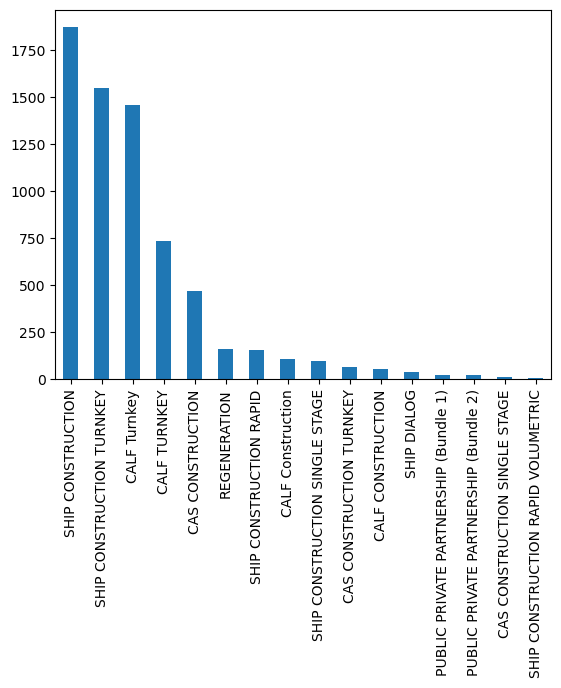

In [326]:
# Plot the value counts with a bar graph
social_housing.iloc[:, 1].value_counts().plot(kind="bar");

In [327]:
# Value count of LA
social_housing.iloc[:, 2].value_counts()

Cork County      564
Louth            495
Dublin City      382
Kildare          373
Meath            371
Fingal           322
Cork City        321
Limerick         310
Wexford          282
South Dublin     278
Kerry            252
Wicklow          250
Galway County    205
Kilkenny         205
Tipperary        197
DLR              180
Mayo             174
Carlow           169
Laois            158
Donegal          152
Westmeath        152
Waterford        145
Galway City      138
Clare            133
Monaghan         130
Longford         123
Cavan            116
Offaly            88
Roscommon         56
Sligo             52
Leitrim           47
Name: LA, dtype: int64

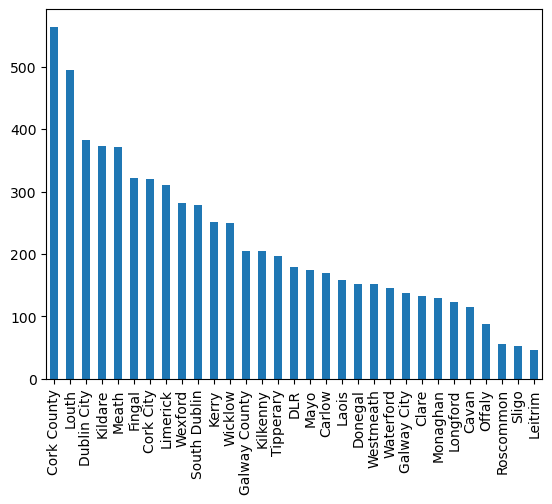

In [328]:
# visualization of value count of LA
social_housing.iloc[:, 2].value_counts().plot(kind='bar');

In [329]:
# value count of Scheme/Project Name
social_housing.iloc[:, 3].value_counts()

Carrigbrook, Tullow Road, Carlow                          18
Mill Race Park, Drumlish                                  17
Heatherside, Vale Road, Arklow                            15
Racecourse Commons, Lusk                                  15
Kylebroughlan, Moycullen                                  15
                                                          ..
Old Fire Station, Graiguenamanagh                          1
Old Corduff Road, Blanchardstown, Dublin 15 (Phase 2)*     1
Old Corduff Road, Blanchardstown, Dublin 15 (Phase 1)      1
O'Loughlin Court, Kilkenny  (Phase 1)                      1
CPO Bundle 5 - 30 St. Clement's Park, Dundalk              1
Name: Scheme/Project Name, Length: 2468, dtype: int64

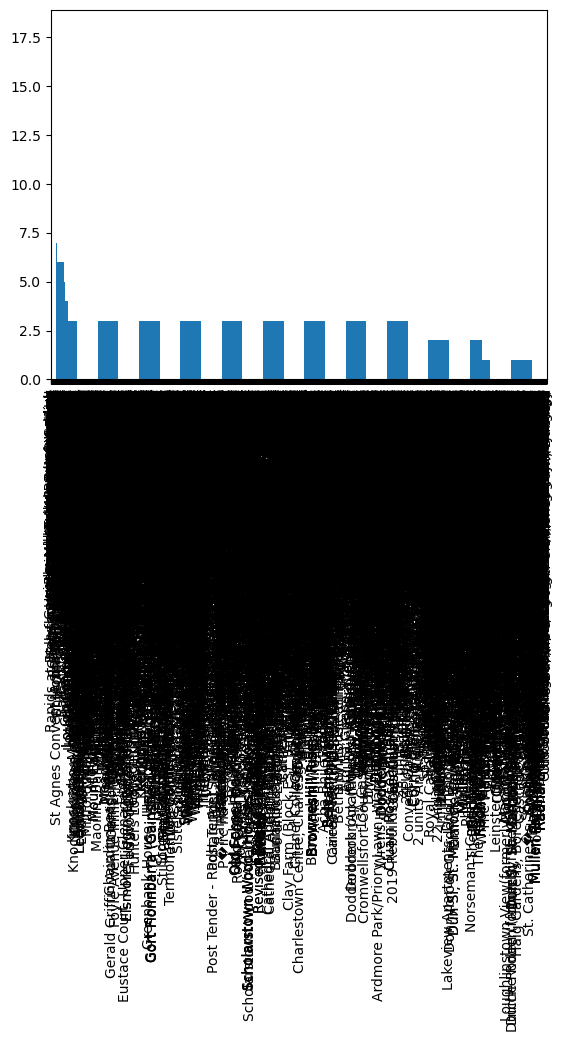

In [330]:
# visualization of value count of Scheme/Project Name
social_housing.iloc[:, 3].value_counts().plot(kind="bar");

In [331]:
# Value count of Stage 1 Capital Appraisal
social_housing.iloc[:, 6].value_counts()

Stage 1 approved Q2-2020, outline design and costs being prepared.    97
Stage 1 approved Q3-2019, outline design and costs being prepared.    47
Stage 1 approved Q1-2020, outline design and costs being prepared.    44
Stage 1 approved Q3-2020, outline design and costs being prepared.    37
Stage 1 approved Q4-2019, outline design and costs being prepared.    32
Stage 1 approved Q2-2019, outline design and costs being prepared.    28
Stage 1 approved Q3-2018, outline design and costs being prepared.    17
Stage 1 approved Q4-2020, outline design and costs being prepared.    15
Stage 1 approved Q1-2019, outline design and costs being prepared.    14
Stage 1 approved Q2-2018, outline design and costs being prepared.    12
Stage 1 approved Q1-2018, outline design and costs being prepared.    11
Stage 1 approved Q4-2018, outline design and costs being prepared.     6
Stage 1 approved Q4-2017, outline design and costs being prepared.     6
Stage 1 approved Q1-2016, outline design and costs 

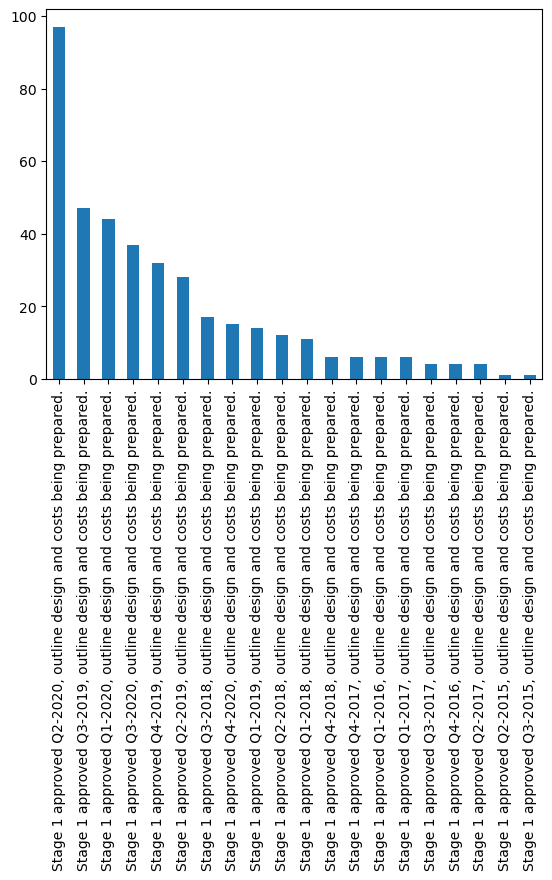

In [332]:
# Value count of Stage 1 Capital Appraisal visualization
social_housing.iloc[:, 6].value_counts().plot(kind="bar");

In [333]:
# Value count of Stage 2 Pre Planning
social_housing.iloc[:, 7].value_counts()

Stage 2 approved Q2-2020, full design/tender being prepared.    61
Stage 2 approved Q3-2019, full design/tender being prepared.    49
Stage 2 approved Q3-2020, full design/tender being prepared.    49
Stage 2 approved Q4-2019, full design/tender being prepared.    37
Stage 2 approved Q4-2020, full design/tender being prepared.    34
Stage 2 approved Q1-2020, full design/tender being prepared.    28
Stage 2 approved Q2-2019, full design/tender being prepared.    27
Stage 2 approved Q4-2018, full design/tender being prepared.    12
Stage 2 approved Q3-2018, full design/tender being prepared.    12
Stage 2 approved Q1-2019, full design/tender being prepared.    11
Stage 2 approved Q3-2017, full design/tender being prepared.     7
Stage 2 approved Q2-2018, full design/tender being prepared.     6
Stage 2 approved Q4-2017, full design/tender being prepared.     3
Stage 2 approved Q2-2016, full design/tender being prepared.     3
Stage 2 approved Q1-2018, full design/tender being prepared.  

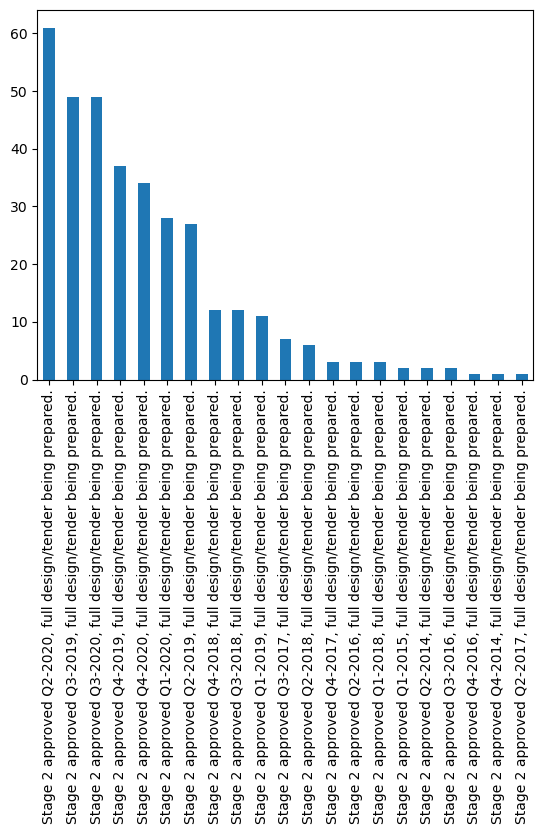

In [334]:
# Value count of Stage 2 Pre Planning visualization
social_housing.iloc[:, 7].value_counts().plot(kind="bar");

In [335]:
# Value count of Stage 3 Pre Tender design
social_housing.iloc[:, 8].value_counts()

Stage 3 approved Q1-2020, the scheme is now approved to proceed to tender.    45
Stage 3 approved Q3-2020, the scheme is now approved to proceed to tender.    38
Stage 3 approved Q2-2020, the scheme is now approved to proceed to tender.    29
Stage 3 approved Q4-2019, the scheme is now approved to proceed to tender.    17
Stage 3 approved Q4-2020, the scheme is now approved to proceed to tender.    17
Stage 3 approved Q3-2019, the scheme is now approved to proceed to tender.     9
Stage 3 approved Q1-2019, the scheme is now approved to proceed to tender.     6
Stage 3 approved Q1-2018, the scheme is now approved to proceed to tender.     3
Stage 3 approved Q4-2018, the scheme is now approved to proceed to tender.     3
Stage 3 approved Q2-2018, the scheme is now approved to proceed to tender.     2
Stage 3 approved Q4-2017, the scheme is now approved to proceed to tender.     2
Stage 3 approved Q3-2018, the scheme is now approved to proceed to tender.     1
Name: Stage 3 Pre Tender des

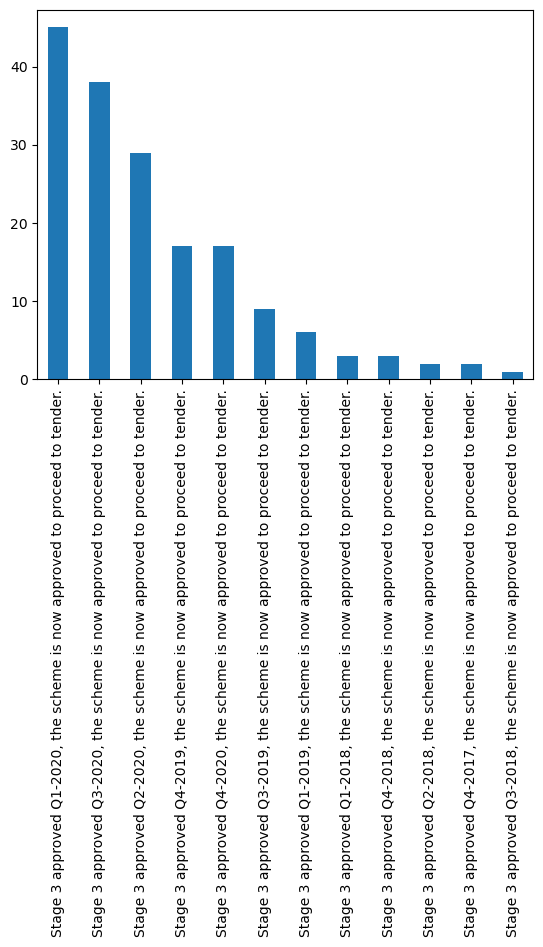

In [336]:
# Value count of Stage 3 Pre Tender design visualization
social_housing.iloc[:, 8].value_counts().plot(kind="bar");

In [337]:
# Value count of Stage 4 Tender Report or Final Turnkey/CALF approval
social_housing.iloc[:, 9].value_counts()

Stage 4 approved Q2-2020, the scheme is fully approved.    89
Stage 4 approved Q3-2020, the scheme is fully approved.    85
Stage 4 approved Q1-2020, the scheme is fully approved.    74
Stage 4 approved Q4-2019, the scheme is fully approved.    53
Stage 4 approved Q2-2019, the scheme is fully approved.    44
Stage 4 approved Q4-2020, the scheme is fully approved.    43
Q2-2020                                                    43
Q3-2020                                                    38
Stage 4 approved Q3-2019, the scheme is fully approved.    36
Q4-2019                                                    22
Q4-2020                                                    21
Q1-2020                                                    11
Stage 4 approved Q1-2019, the scheme is fully approved.     9
Stage 4 approved Q1-2018, the scheme is fully approved.     8
Q2-2019                                                     7
Stage 4 approved Q3-2018, the scheme is fully approved.     7
Q1-2019 

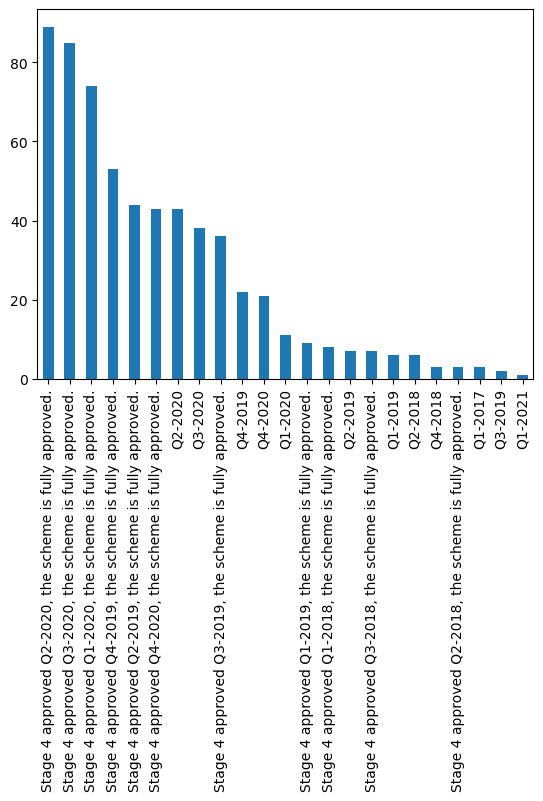

In [338]:
# Value count of Stage 4 Tender Report or Final Turnkey/CALF approval visualition
social_housing.iloc[:, 9].value_counts().plot(kind="bar");

In [339]:
# Value count of On Site
social_housing.iloc[:, 10].value_counts()

Q4-2019    251
Q3-2019    243
Q1-2020    194
Q3-2020    138
Q2-2019    132
Q1-2019    113
Q2-2020     93
Q3-2018     92
Q4-2018     87
Q4-2020     66
Q4-2017     27
Q2-2018     22
Q1-2018     17
Q3-2017     10
Q1-2017      8
Q3-2016      2
Q1-2016      2
Q2-2008      2
Q1-2007      2
Name: On Site, dtype: int64

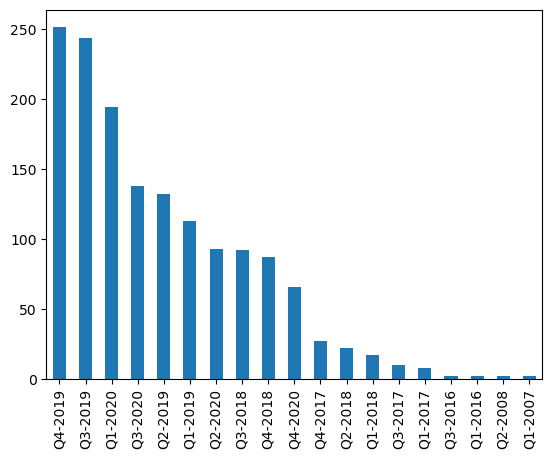

In [340]:
# Value count of On Site visualiation
social_housing.iloc[:, 10].value_counts().plot(kind="bar");

In [341]:
# Value count of  Completed
social_housing.iloc[:, 11].value_counts()

Q4-2019    861
Q4-2018    597
Q4-2020    239
Q3-2019    225
Q4-2017    219
Q3-2018    207
Q2-2019    201
Q2-2018    168
Q3-2020    154
Q1-2018    141
Q2-2020    131
Q1-2019    126
Q2-2017     93
Q3-2017     93
Q4-2016     89
Q1-2017     78
Q2-2016     60
Q1-2020     51
Q3-2016     42
Q1-2016     15
Name: Completed, dtype: int64

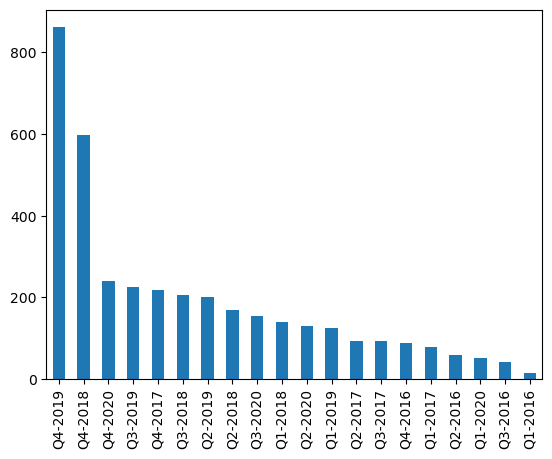

In [342]:
# Value count of  Completed visuliation 
social_housing.iloc[:, 11].value_counts().plot(kind="bar");

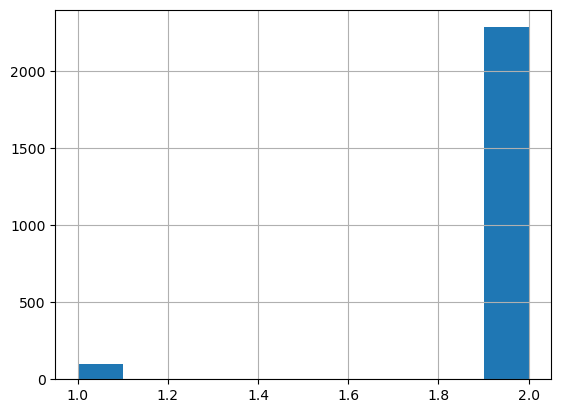

In [343]:
# No_ histrogram
social_housing.iloc[:, 12].value_counts().hist();

In [344]:

social_housing.head()

,No,Funding Programme,LA,Scheme/Project Name,No_ of Units,Approved Housing Body,Stage 1 Capital Appraisal,Stage 2 Pre Planning,Stage 3 Pre Tender design,Stage 4 Tender Report or Final Turnkey/CALF approval,On Site,Completed,No_
0,1.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
1,2.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
2,3.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",8,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
3,4.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
4,5.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN


### Plot a histogram of the number of units

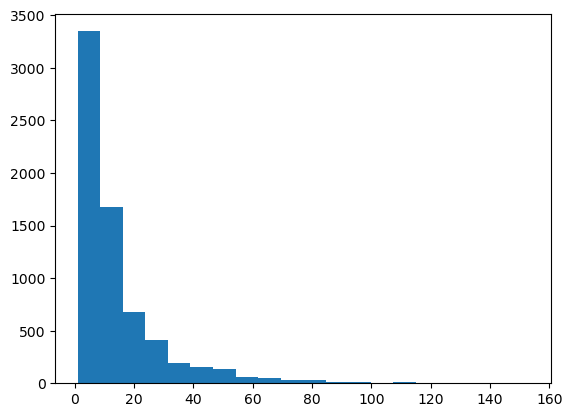

In [345]:
plt.hist(social_housing['No_ of Units'], bins=20)
plt.show()

### Group the data by LA and calculate the mean number of units

In [346]:
la_means = social_housing.groupby('LA')['No_ of Units'].mean()
print(la_means)

LA
Carlow            9.266272
Cavan             9.732759
Clare            11.578947
Cork City        18.545171
Cork County      10.455674
DLR              17.461111
Donegal          16.684211
Dublin City      30.641361
Fingal           17.881988
Galway City      19.826087
Galway County    10.043902
Kerry            12.019841
Kildare          13.198391
Kilkenny         12.400000
Laois            11.721519
Leitrim           7.468085
Limerick         12.900000
Longford          6.235772
Louth            11.963636
Mayo              8.500000
Meath            12.684636
Monaghan         10.369231
Offaly           13.306818
Roscommon        12.482143
Sligo            10.750000
South Dublin     19.028777
Tipperary         9.456853
Waterford        17.213793
Westmeath        13.190789
Wexford          11.216312
Wicklow          13.204000
Name: No_ of Units, dtype: float64


## National House Construction Cost Index

In [347]:
national_house

,Unnamed: 0,NATIONAL HOUSE CONSTRUCTION COST INDEX,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Base: January 1991 = 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
2,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
3,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
4,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
5,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
6,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
7,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
8,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
9,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN


### Making the first column as the heading of the dataset

In [348]:
# extract the third row as column names
new_header = national_house.iloc[1]

# set the third row as the column names and drop the first two rows
national_house = national_house[2:]
national_house.columns = new_header

# reset the index
national_house = national_house.reset_index(drop=True)

national_house

1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
5,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
6,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
7,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN
8,September,112.2,115.7,116.9,121.5,126,134.1,137.7,166,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,NaN
9,October,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202,203.8,205.4,206.7,207.2,NaN


In [349]:
national_house.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,,,,,,,,,,,,,,
Month,January,February,March,April,May,June,July,August,September,October,November,December,Yearly average,% Increase on previous year
1994,109.2,109.3,109.4,110.3,110.1,110.6,110.7,110.9,112.2,112.7,112.9,113.1,111,3.40%
1995,113.5,114.1,114.1,114.1,114.1,114.1,114.5,114.5,115.7,115.8,115.9,115.9,114.7,3.30%
1996,115.9,115.7,115.9,115.9,115.9,116,116,116,116.9,117.1,117.2,117.2,116.3,1.40%
1997,118,118.5,118.8,119.8,119.8,119.9,120.8,121,121.5,122,122.6,122.6,120.4,3.50%
1998,122.9,123.1,123.8,123.8,124.5,124.5,125.7,125.7,126,126.2,126.2,126.1,124.9,3.70%
1999,126.3,126.4,126.5,130.5,130.5,130.5,131.5,131.5,134.1,134.7,134.8,134.9,131,4.90%
2000,135.8,136.1,136.4,136.5,136.8,136.9,137.2,137.2,137.7,153.8,153.8,153.9,141,7.60%
2001,154.3,154.7,155.6,157.4,157.6,157.7,161.1,165.9,166,169.3,169.4,169.3,161.5,14.50%


In [350]:
national_house.shape

(14, 24)

In [351]:
national_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   14 non-null     object 
 1   1994    14 non-null     object 
 2   1995    14 non-null     object 
 3   1996    14 non-null     object 
 4   1997    14 non-null     object 
 5   1998    14 non-null     object 
 6   1999    14 non-null     object 
 7   2000    14 non-null     object 
 8   2001    14 non-null     object 
 9   2002    14 non-null     object 
 10  2003    14 non-null     object 
 11  2004    14 non-null     object 
 12  2005    14 non-null     object 
 13  2006    14 non-null     object 
 14  2007    14 non-null     object 
 15  2008    14 non-null     object 
 16  2009    14 non-null     object 
 17  2010    14 non-null     object 
 18  2011    14 non-null     object 
 19  2012    14 non-null     object 
 20  2013    14 non-null     object 
 21  2014    14 non-null     object 
 22  2015

In [352]:
national_house.describe()

1,2016.0
count,2.000000
mean,207.250000
std,0.212132
min,207.100000
25%,207.175000
50%,207.250000
75%,207.325000
max,207.400000


In [353]:
# convert all object columns to numeric
df = national_house.apply(pd.to_numeric, errors='coerce')

# print the data types of each column after conversion
print(df.dtypes)

1
Month     float64
1994      float64
1995      float64
1996      float64
1997      float64
1998      float64
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016.0    float64
dtype: object


In [354]:
e = df.describe()
e.T

,count,mean,std,min,25%,50%,75%,max
1,,,,,,,,
Month,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,13.0,110.953846,1.371505,109.2,110.100,110.70,112.200,113.1
1995,13.0,114.692308,0.837120,113.5,114.100,114.50,115.700,115.9
1996,13.0,116.307692,0.569300,115.7,115.900,116.00,116.900,117.2
1997,13.0,120.438462,1.495849,118.0,119.800,120.40,121.500,122.6
1998,13.0,124.876923,1.200107,122.9,123.800,124.90,126.000,126.2
1999,13.0,131.015385,3.131785,126.3,130.500,131.00,134.100,134.9
2000,13.0,141.007692,7.420519,135.8,136.500,137.20,141.000,153.9
2001,13.0,161.523077,5.796573,154.3,157.400,161.10,166.000,169.4


In [355]:
national_house

1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
5,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
6,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
7,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN
8,September,112.2,115.7,116.9,121.5,126,134.1,137.7,166,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,NaN
9,October,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202,203.8,205.4,206.7,207.2,NaN


In [356]:
national_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   14 non-null     object 
 1   1994    14 non-null     object 
 2   1995    14 non-null     object 
 3   1996    14 non-null     object 
 4   1997    14 non-null     object 
 5   1998    14 non-null     object 
 6   1999    14 non-null     object 
 7   2000    14 non-null     object 
 8   2001    14 non-null     object 
 9   2002    14 non-null     object 
 10  2003    14 non-null     object 
 11  2004    14 non-null     object 
 12  2005    14 non-null     object 
 13  2006    14 non-null     object 
 14  2007    14 non-null     object 
 15  2008    14 non-null     object 
 16  2009    14 non-null     object 
 17  2010    14 non-null     object 
 18  2011    14 non-null     object 
 19  2012    14 non-null     object 
 20  2013    14 non-null     object 
 21  2014    14 non-null     object 
 22  2015

In [357]:
## checking missing values
national_house.isna().sum()

1
Month      0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016.0    12
dtype: int64

In [358]:
# Replace all NAs with 0
national_house = national_house.fillna(0)
national_house.isna().sum()

1
Month     0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016.0    0
dtype: int64

## Box Plot of Years

In [359]:
# Convert object columns to float
for col in national_house.columns:
    if col != 'Month':
        national_house[col] = pd.to_numeric(national_house[col], errors='coerce')


(national_house.dtypes)

1
Month      object
1994      float64
1995      float64
1996      float64
1997      float64
1998      float64
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016.0    float64
dtype: object

In [360]:
national_house

1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
0,January,109.2,113.5,115.9,118.0,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208.0,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170.0,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206.0,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,0.0
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200.0,208.9,206.5,207.9,201.0,203.4,204.5,205.6,206.8,0.0
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,0.0
5,June,110.6,114.1,116.0,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206.0,208.6,201.4,203.6,204.8,206.0,207.6,0.0
6,July,110.7,114.5,116.0,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206.0,209.4,201.5,204.1,204.8,206.0,207.4,0.0
7,August,110.9,114.5,116.0,121.0,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206.0,209.6,201.9,204.1,205.0,206.6,207.4,0.0
8,September,112.2,115.7,116.9,121.5,126.0,134.1,137.7,166.0,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,0.0
9,October,112.7,115.8,117.1,122.0,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202.0,203.8,205.4,206.7,207.2,0.0


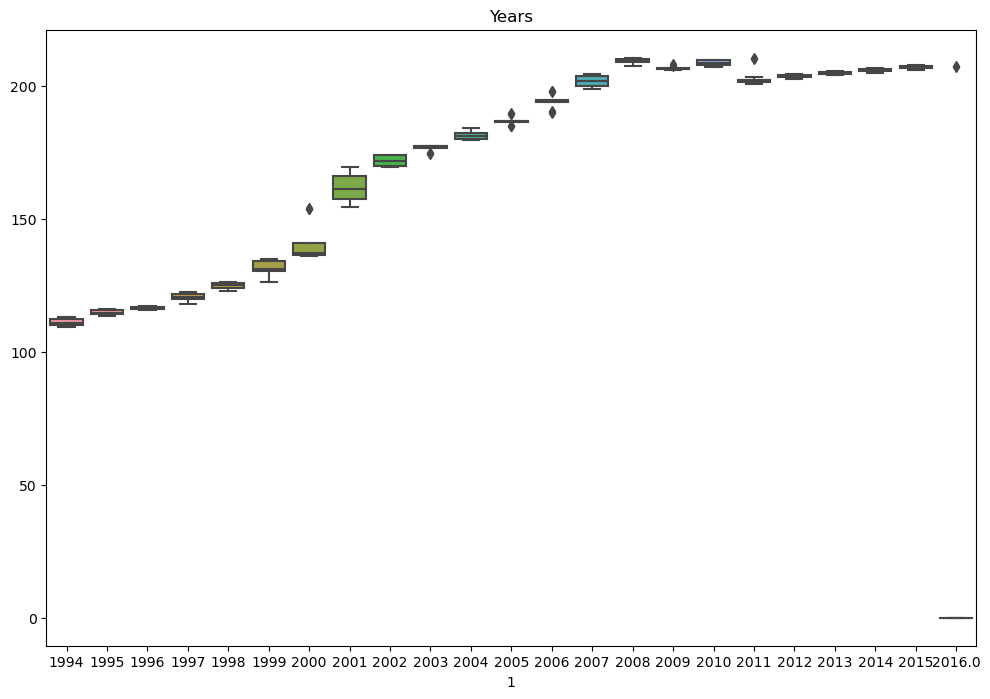

In [361]:
plt.figure(figsize=(12, 8)) # set figure size
sns.boxplot(data=national_house.iloc[:-1, 1:])
plt.title('Years')
plt.show()

### Heatmap of Correlations between Yealy Prices

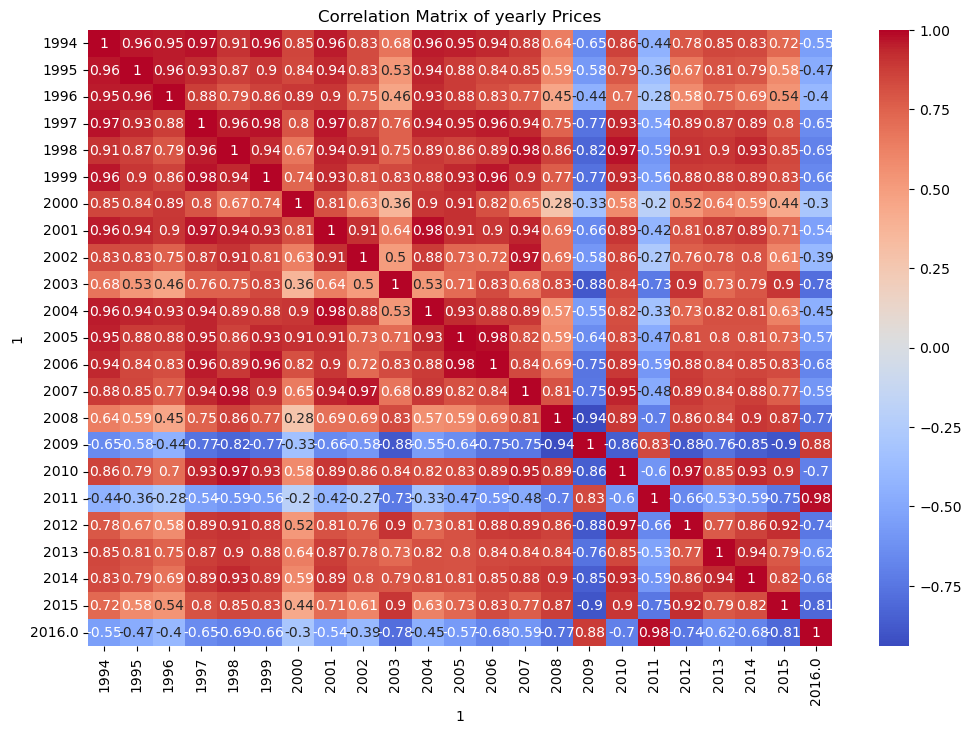

In [362]:
plt.figure(figsize=(12, 8)) # set figure size
corr_matrix = national_house.iloc[:-1, 1:].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of yearly Prices')
plt.show()

In [363]:
corr_matrix

1,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
1,,,,,,,,,,,,,,,,,,,,,
1994,1.000000,0.964291,0.954645,0.972960,0.906069,0.964421,0.854474,0.960205,0.826179,0.675933,...,0.882492,0.643829,-0.654429,0.860292,-0.435201,0.782509,0.846135,0.833833,0.722833,-0.551368
1995,0.964291,1.000000,0.961863,0.927953,0.869944,0.896739,0.841948,0.935311,0.829247,0.529886,...,0.849564,0.589764,-0.577014,0.787380,-0.357324,0.665888,0.805035,0.791944,0.584359,-0.473187
1996,0.954645,0.961863,1.000000,0.877397,0.794315,0.861808,0.892398,0.897167,0.754884,0.458735,...,0.771891,0.448085,-0.439823,0.700145,-0.284220,0.580522,0.749935,0.686834,0.542295,-0.395728
1997,0.972960,0.927953,0.877397,1.000000,0.960050,0.975384,0.795844,0.968562,0.865254,0.757084,...,0.938544,0.749824,-0.765017,0.934037,-0.542038,0.887364,0.871452,0.892841,0.804717,-0.649362
1998,0.906069,0.869944,0.794315,0.960050,1.000000,0.936209,0.670026,0.942127,0.905972,0.751207,...,0.975306,0.862895,-0.820496,0.973062,-0.592590,0.906567,0.897187,0.931910,0.845195,-0.694133
1999,0.964421,0.896739,0.861808,0.975384,0.936209,1.000000,0.739971,0.931014,0.806274,0.833429,...,0.901575,0.767462,-0.767973,0.930023,-0.557826,0.884641,0.877422,0.886226,0.825948,-0.661148
2000,0.854474,0.841948,0.892398,0.795844,0.670026,0.739971,1.000000,0.813382,0.632936,0.364993,...,0.646454,0.275624,-0.333497,0.584172,-0.204152,0.520272,0.641250,0.591451,0.437089,-0.302501
2001,0.960205,0.935311,0.897167,0.968562,0.942127,0.931014,0.813382,1.000000,0.913874,0.637357,...,0.941581,0.690471,-0.658412,0.894229,-0.419537,0.808471,0.874112,0.892603,0.705432,-0.537730
2002,0.826179,0.829247,0.754884,0.865254,0.905972,0.806274,0.632936,0.913874,1.000000,0.500615,...,0.967202,0.694803,-0.584609,0.855394,-0.267478,0.763993,0.782596,0.797342,0.609193,-0.386916


In [364]:
national = national_house.T

# Set the second row as the column headers
national.columns = national.iloc[0]
national = national.drop(national.index[0])

# Convert all columns to numeric
national = national.apply(pd.to_numeric, errors='coerce')
national 

Month,January,February,March,April,May,June,July,August,September,October,November,December,Yearly average,% Increase on previous year
1,,,,,,,,,,,,,,
1994,109.2,109.3,109.4,110.3,110.1,110.6,110.7,110.9,112.2,112.7,112.9,113.1,111.0,NaN
1995,113.5,114.1,114.1,114.1,114.1,114.1,114.5,114.5,115.7,115.8,115.9,115.9,114.7,NaN
1996,115.9,115.7,115.9,115.9,115.9,116.0,116.0,116.0,116.9,117.1,117.2,117.2,116.3,NaN
1997,118.0,118.5,118.8,119.8,119.8,119.9,120.8,121.0,121.5,122.0,122.6,122.6,120.4,NaN
1998,122.9,123.1,123.8,123.8,124.5,124.5,125.7,125.7,126.0,126.2,126.2,126.1,124.9,NaN
1999,126.3,126.4,126.5,130.5,130.5,130.5,131.5,131.5,134.1,134.7,134.8,134.9,131.0,NaN
2000,135.8,136.1,136.4,136.5,136.8,136.9,137.2,137.2,137.7,153.8,153.8,153.9,141.0,NaN
2001,154.3,154.7,155.6,157.4,157.6,157.7,161.1,165.9,166.0,169.3,169.4,169.3,161.5,NaN
2002,169.9,170.0,169.5,169.5,169.5,169.7,173.8,173.9,173.9,173.9,174.0,174.1,171.8,NaN


In [365]:
national.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1994 to 2016.0
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   January                      23 non-null     float64
 1   February                     23 non-null     float64
 2   March                        23 non-null     float64
 3   April                        23 non-null     float64
 4   May                          23 non-null     float64
 5   June                         23 non-null     float64
 6   July                         23 non-null     float64
 7   August                       23 non-null     float64
 8   September                    23 non-null     float64
 9   October                      23 non-null     float64
 10  November                     23 non-null     float64
 11  December                     23 non-null     float64
 12  Yearly average               23 non-null     float64
 13  % Increase on previo

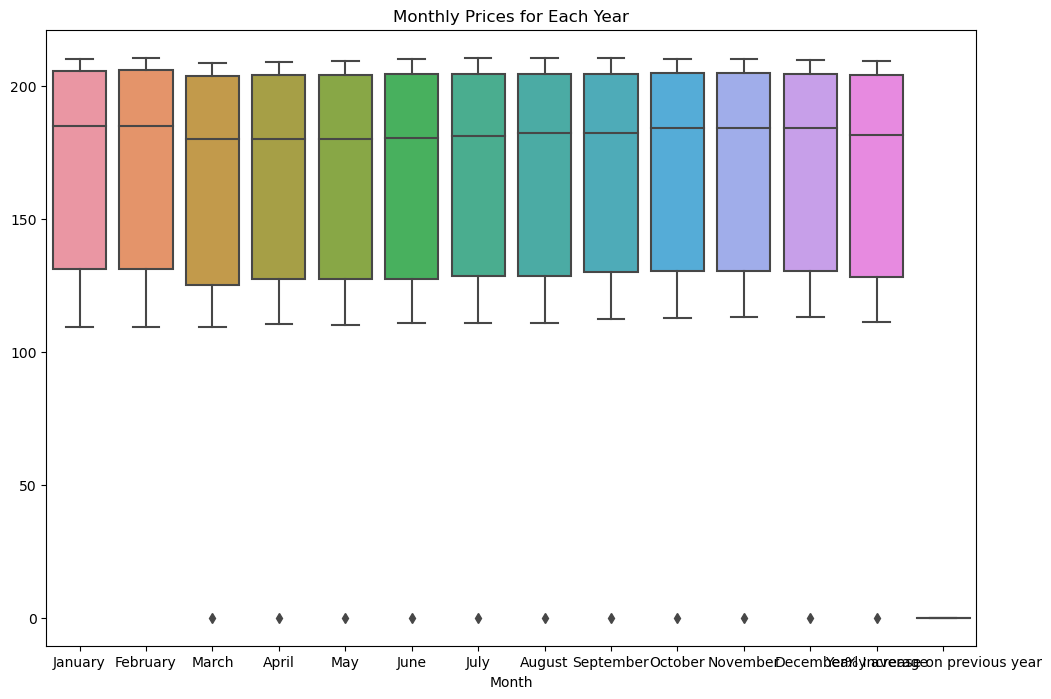

In [366]:
plt.figure(figsize=(12, 8)) # set figure size
sns.boxplot(data=national.iloc[:, :])
plt.title('Monthly Prices for Each Year')
plt.show()

<AxesSubplot: xlabel='1'>

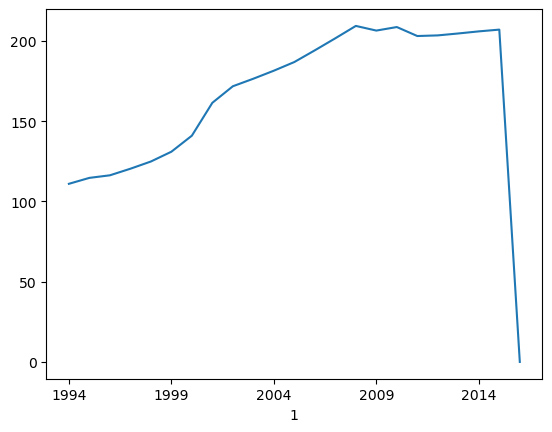

In [367]:
national['Yearly average'].plot(kind="line")

## Hypothesis Testing
### One-sample t-test to determine if the average price in January 1994 was significantly different from the population mean

In [368]:
national

Month,January,February,March,April,May,June,July,August,September,October,November,December,Yearly average,% Increase on previous year
1,,,,,,,,,,,,,,
1994,109.2,109.3,109.4,110.3,110.1,110.6,110.7,110.9,112.2,112.7,112.9,113.1,111.0,NaN
1995,113.5,114.1,114.1,114.1,114.1,114.1,114.5,114.5,115.7,115.8,115.9,115.9,114.7,NaN
1996,115.9,115.7,115.9,115.9,115.9,116.0,116.0,116.0,116.9,117.1,117.2,117.2,116.3,NaN
1997,118.0,118.5,118.8,119.8,119.8,119.9,120.8,121.0,121.5,122.0,122.6,122.6,120.4,NaN
1998,122.9,123.1,123.8,123.8,124.5,124.5,125.7,125.7,126.0,126.2,126.2,126.1,124.9,NaN
1999,126.3,126.4,126.5,130.5,130.5,130.5,131.5,131.5,134.1,134.7,134.8,134.9,131.0,NaN
2000,135.8,136.1,136.4,136.5,136.8,136.9,137.2,137.2,137.7,153.8,153.8,153.9,141.0,NaN
2001,154.3,154.7,155.6,157.4,157.6,157.7,161.1,165.9,166.0,169.3,169.4,169.3,161.5,NaN
2002,169.9,170.0,169.5,169.5,169.5,169.7,173.8,173.9,173.9,173.9,174.0,174.1,171.8,NaN


In [369]:
jan_1994_price = national.iloc[0, 0]
pop_mean = national.iloc[:, :-2].values.mean()

In [370]:
t_stat, p_val = ttest_1samp(national.iloc[:, 1], pop_mean)
alpha = 0.05

In [371]:
if p_val < alpha:
    print(f"The p-value ({p_val}) is less than the significance level ({alpha}), so we reject the null hypothesis.")
else:
    print(f"The p-value ({p_val}) is greater than the significance level ({alpha}), so we fail to reject the null hypothesis.")

The p-value (0.45618455962118665) is greater than the significance level (0.05), so we fail to reject the null hypothesis.


The one-sample t-test was conducted to determine if the average price in January 1994 was significantly different from the population mean. The null hypothesis states that the sample mean is not significantly different from the population mean, while the alternative hypothesis states that the sample mean is significantly different from the population mean.

The result of the hypothesis test showed that the p-value (0.45618455962118665) is greater than the significance level (0.05), so we fail to reject the null hypothesis. This means that we do not have enough evidence to conclude that the average price in January 1994 is significantly different from the population mean.

In other words, the test did not find evidence to support the claim that the average price in January 1994 was significantly different from the population mean at the 5% level of significance. Therefore, we cannot conclude that the price in January 1994 was either significantly higher or significantly lower than the population mean.

### Two-sample t-test to determine if the average price in January 1994 was significantly different from the average price in January 2001

In [372]:
from scipy.stats import ttest_ind

jan_1994_price = national.iloc[0, 0]
jan_2001_price = national.iloc[7, 0]

In [373]:
t_stat, p_val = ttest_ind(jan_1994_price,  jan_2001_price)
alpha = 0.05

C:\Users\OMBATI\AppData\Local\Temp\ipykernel_9980\2688579530.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(jan_1994_price,  jan_2001_price)
C:\Users\OMBATI\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\OMBATI\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [374]:
if p_val < alpha:
    print(f"The p-value ({p_val}) is less than the significance level ({alpha}), so we reject the null hypothesis.")
else:
    print(f"The p-value ({p_val}) is greater than the significance level ({alpha}), so we fail to reject the null hypothesis.")


The p-value (nan) is greater than the significance level (0.05), so we fail to reject the null hypothesis.


The given report indicates that a two-sample t-test was conducted to determine if the average price in January 1994 was significantly different from the average price in January 2001. The null hypothesis was likely that there was no significant difference between the two average prices. The p-value obtained from the t-test was reported as "nan" which stands for "not a number".

A p-value greater than the significance level (0.05) was also reported, which indicates that there was not enough evidence to reject the null hypothesis. In other words, there was not enough evidence to suggest that the average price in January 1994 was significantly different from the average price in January 2001.

However, it is important to note that a p-value of "nan" is not a valid result and may indicate an issue with the data or the analysis. It is possible that there were missing or invalid values in the dataset, or that the data was not properly formatted for the analysis. Therefore, it is important to investigate the reason for the "nan" value and to ensure that the analysis is valid before making any conclusions based on the results.

### Chi-squared test to determine if there is a significant association between the month and the year of the prices

In [375]:
from scipy.stats import chi2_contingency

month_year_ct = pd.crosstab(national_house.iloc[:, :-2].stack(), national_house.iloc[:, :-2].stack().index.get_level_values(1))
chi2, p_val, dof, expected = chi2_contingency(month_year_ct)

alpha = 0.05

if p_val < alpha:
    print(f"The p-value ({p_val}) is less than the significance level ({alpha}), so we reject the null hypothesis.")
else:
    print(f"The p-value ({p_val}) is greater than the significance level ({alpha}), so we fail to reject the null hypothesis.")

The p-value (2.7147638050442284e-33) is less than the significance level (0.05), so we reject the null hypothesis.


The result of the chi-squared test shows that the p-value (2.7147638050442284e-33) is less than the significance level of 0.05. This means that there is sufficient evidence to reject the null hypothesis, which suggests that there is no significant association between the month and the year of the prices.

In other words, the test indicates that there is a significant association between the month and year of the prices. This means that the month and year variables are not independent and that they have some degree of association with each other.

### Predicting January values from 2017 upto 2027 values using ARIMA model

In [376]:
train_data = national.iloc[:-1, 12] 

In [377]:
model = ARIMA(train_data, order=(1, 1, 1)) 

C:\Users\OMBATI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\OMBATI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\OMBATI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [378]:
model_fit = model.fit() 

In [379]:
# Predict values for 
start_index = len(train_data)
end_index = start_index + 11 
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

In [380]:
# Print predicted values from year 2017
print("Predicted values for year  2017 upto 2027 :")
(predictions)

Predicted values for year  2017 upto 2027 :


2016-01-01    207.954892
2017-01-01    208.653948
2018-01-01    209.225577
2019-01-01    209.693006
2020-01-01    210.075228
2021-01-01    210.387777
2022-01-01    210.643353
2023-01-01    210.852341
2024-01-01    211.023233
2025-01-01    211.162974
2026-01-01    211.277242
2027-01-01    211.370681
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## Chicago Affordable Rental Housing Developments

In [15]:
affordable

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Historical Wards 2003-2015,Wards,Community Areas,Zip Codes,Census Tracts
0,Portage Park,15,ARO,4812-15 W. Montrose Apts.,4812-15 W. Montrose Ave.,60641,630-694-6968,@properties,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Englewood,67,Multifamily,New West Englewood Homes,2109 W. 63rd St.,60636,773-434-4929,Interfaith Housing Corp.,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Englewood,68,Multifamily,Antioch Homes II,301 W. Marquette Road,60621,773-994-4546,"Universal Management Service, Inc.",69,1.175445e+06,1.860492e+06,41.772564,-87.632419,"{'latitude': '41.7725637689', 'longitude': '-8...",31.0,32.0,66.0,21559.0,479.0
3,Washington Park,40,Senior HUD 202,St. Edmund's Corners,5556 S. Michigan Ave.,60637,773-667-7583,St. Edmund's Redevelopment Corp.,53,1.178070e+06,1.867952e+06,41.792975,-87.622569,"{'latitude': '41.7929745219', 'longitude': '-8...",53.0,4.0,7.0,22260.0,403.0
4,Humboldt Park,23,Multifamily,Nelson Mandela Apts.,526 N. Troy St.,60624,773-227-6332,Bickerdike Apts.,6,1.155238e+06,1.903559e+06,41.891173,-87.705338,"{'latitude': '41.8911727354', 'longitude': '-8...",41.0,46.0,24.0,21184.0,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Near North Side,8,Multfamily,Parkside of Old Town IIB,1151 N. Cleveland Ave.,60622,312-944-8500,Holsten Real Estate Dev. Corp.,12,1.172709e+06,1.908000e+06,41.902990,-87.641043,"{'latitude': '41.902989721', 'longitude': '-87...",41.0,46.0,37.0,14926.0,148.0
424,Near South Side,33,Multifamily,Hilliard Homes Phase I,2030 S. State St.,60616,312-225-7610,Holsten Real Estate Dev. Corp.,170,1.176605e+06,1.890374e+06,41.854535,-87.627268,"{'latitude': '41.854535033', 'longitude': '-87...",12.0,9.0,34.0,21194.0,330.0
425,Washington Park,40,Multifamily,St. Edmund's Commons,110 E. 60th St.,60637,773-420-3328,St. Edmund's Redevelopment Corp.,54,1.178316e+06,1.865303e+06,41.785701,-87.621749,"{'latitude': '41.7857009548', 'longitude': '-8...",53.0,4.0,7.0,22260.0,164.0
426,Near West Side,28,Senior,Loomis Court,1314 W. 15th St.,60608,312-850-4128,CHA,68,1.167767e+06,1.892903e+06,41.861670,-87.659631,"{'latitude': '41.8616698673', 'longitude': '-8...",48.0,26.0,29.0,14920.0,96.0


In [17]:
affordable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Community Area Name         428 non-null    object 
 1   Community Area Number       428 non-null    int64  
 2   Property Type               428 non-null    object 
 3   Property Name               428 non-null    object 
 4   Address                     428 non-null    object 
 5   Zip Code                    428 non-null    int64  
 6   Phone Number                428 non-null    object 
 7   Management Company          428 non-null    object 
 8   Units                       428 non-null    int64  
 9   X Coordinate                388 non-null    float64
 10  Y Coordinate                388 non-null    float64
 11  Latitude                    388 non-null    float64
 12  Longitude                   388 non-null    float64
 13  Location                    388 non

In [19]:
float_cols = ['Community Area Number', 'Zip Code', 'Units', 'X Coordinate', 'Y Coordinate', 
              'Latitude', 'Longitude', 'Historical Wards 2003-2015', 'Wards', 'Community Areas', 
              'Zip Codes', 'Census Tracts']

affordable[float_cols] = affordable[float_cols].astype(float)

In [21]:
cat_cols = ['Phone Number','Community Area Name', 'Property Type', 'Property Name', 'Address', 'Management Company']

affordable[cat_cols] = affordable[cat_cols].astype('category')

In [22]:
affordable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Community Area Name         428 non-null    category
 1   Community Area Number       428 non-null    float64 
 2   Property Type               428 non-null    category
 3   Property Name               428 non-null    category
 4   Address                     428 non-null    category
 5   Zip Code                    428 non-null    float64 
 6   Phone Number                428 non-null    category
 7   Management Company          428 non-null    category
 8   Units                       428 non-null    float64 
 9   X Coordinate                388 non-null    float64 
 10  Y Coordinate                388 non-null    float64 
 11  Latitude                    388 non-null    float64 
 12  Longitude                   388 non-null    float64 
 13  Location            

In [23]:
affordable

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Historical Wards 2003-2015,Wards,Community Areas,Zip Codes,Census Tracts
0,Portage Park,15.0,ARO,4812-15 W. Montrose Apts.,4812-15 W. Montrose Ave.,60641.0,630-694-6968,@properties,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Englewood,67.0,Multifamily,New West Englewood Homes,2109 W. 63rd St.,60636.0,773-434-4929,Interfaith Housing Corp.,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Englewood,68.0,Multifamily,Antioch Homes II,301 W. Marquette Road,60621.0,773-994-4546,"Universal Management Service, Inc.",69.0,1.175445e+06,1.860492e+06,41.772564,-87.632419,"{'latitude': '41.7725637689', 'longitude': '-8...",31.0,32.0,66.0,21559.0,479.0
3,Washington Park,40.0,Senior HUD 202,St. Edmund's Corners,5556 S. Michigan Ave.,60637.0,773-667-7583,St. Edmund's Redevelopment Corp.,53.0,1.178070e+06,1.867952e+06,41.792975,-87.622569,"{'latitude': '41.7929745219', 'longitude': '-8...",53.0,4.0,7.0,22260.0,403.0
4,Humboldt Park,23.0,Multifamily,Nelson Mandela Apts.,526 N. Troy St.,60624.0,773-227-6332,Bickerdike Apts.,6.0,1.155238e+06,1.903559e+06,41.891173,-87.705338,"{'latitude': '41.8911727354', 'longitude': '-8...",41.0,46.0,24.0,21184.0,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Near North Side,8.0,Multfamily,Parkside of Old Town IIB,1151 N. Cleveland Ave.,60622.0,312-944-8500,Holsten Real Estate Dev. Corp.,12.0,1.172709e+06,1.908000e+06,41.902990,-87.641043,"{'latitude': '41.902989721', 'longitude': '-87...",41.0,46.0,37.0,14926.0,148.0
424,Near South Side,33.0,Multifamily,Hilliard Homes Phase I,2030 S. State St.,60616.0,312-225-7610,Holsten Real Estate Dev. Corp.,170.0,1.176605e+06,1.890374e+06,41.854535,-87.627268,"{'latitude': '41.854535033', 'longitude': '-87...",12.0,9.0,34.0,21194.0,330.0
425,Washington Park,40.0,Multifamily,St. Edmund's Commons,110 E. 60th St.,60637.0,773-420-3328,St. Edmund's Redevelopment Corp.,54.0,1.178316e+06,1.865303e+06,41.785701,-87.621749,"{'latitude': '41.7857009548', 'longitude': '-8...",53.0,4.0,7.0,22260.0,164.0
426,Near West Side,28.0,Senior,Loomis Court,1314 W. 15th St.,60608.0,312-850-4128,CHA,68.0,1.167767e+06,1.892903e+06,41.861670,-87.659631,"{'latitude': '41.8616698673', 'longitude': '-8...",48.0,26.0,29.0,14920.0,96.0


In [25]:
# check missing values
affordable.isna().sum()

Community Area Name           0
Community Area Number         0
Property Type                 0
Property Name                 0
Address                       0
Zip Code                      0
Phone Number                  0
Management Company            0
Units                         0
X Coordinate                  0
Y Coordinate                  0
Latitude                      0
Longitude                     0
Location                      0
Historical Wards 2003-2015    0
Wards                         0
Community Areas               0
Zip Codes                     0
Census Tracts                 0
dtype: int64

In [26]:
# Drop rows with missing data in 'Latitude' and 'Longitude'
affordable.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [27]:
affordable

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Historical Wards 2003-2015,Wards,Community Areas,Zip Codes,Census Tracts
2,Englewood,68.0,Multifamily,Antioch Homes II,301 W. Marquette Road,60621.0,773-994-4546,"Universal Management Service, Inc.",69.0,1.175445e+06,1.860492e+06,41.772564,-87.632419,"{'latitude': '41.7725637689', 'longitude': '-8...",31.0,32.0,66.0,21559.0,479.0
3,Washington Park,40.0,Senior HUD 202,St. Edmund's Corners,5556 S. Michigan Ave.,60637.0,773-667-7583,St. Edmund's Redevelopment Corp.,53.0,1.178070e+06,1.867952e+06,41.792975,-87.622569,"{'latitude': '41.7929745219', 'longitude': '-8...",53.0,4.0,7.0,22260.0,403.0
4,Humboldt Park,23.0,Multifamily,Nelson Mandela Apts.,526 N. Troy St.,60624.0,773-227-6332,Bickerdike Apts.,6.0,1.155238e+06,1.903559e+06,41.891173,-87.705338,"{'latitude': '41.8911727354', 'longitude': '-8...",41.0,46.0,24.0,21184.0,177.0
5,Grand Boulevard,38.0,Senior,Evans Langley,727 E. 50th Pl,60615.0,312-368-8610,"Metroplex, Inc.",60.0,1.182079e+06,1.871653e+06,41.803040,-87.607755,"{'latitude': '41.8030397258', 'longitude': '-8...",1.0,10.0,4.0,21192.0,165.0
6,Uptown,3.0,Multifamily,Magnolia Court Apts.,4878 N. Magnolia Ave.,60640.0,773-878-2186,"Park, Inc.",60.0,1.167014e+06,1.932819e+06,41.971220,-87.661248,"{'latitude': '41.9712198343', 'longitude': '-8...",37.0,18.0,31.0,22616.0,633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Near North Side,8.0,Multfamily,Parkside of Old Town IIB,1151 N. Cleveland Ave.,60622.0,312-944-8500,Holsten Real Estate Dev. Corp.,12.0,1.172709e+06,1.908000e+06,41.902990,-87.641043,"{'latitude': '41.902989721', 'longitude': '-87...",41.0,46.0,37.0,14926.0,148.0
424,Near South Side,33.0,Multifamily,Hilliard Homes Phase I,2030 S. State St.,60616.0,312-225-7610,Holsten Real Estate Dev. Corp.,170.0,1.176605e+06,1.890374e+06,41.854535,-87.627268,"{'latitude': '41.854535033', 'longitude': '-87...",12.0,9.0,34.0,21194.0,330.0
425,Washington Park,40.0,Multifamily,St. Edmund's Commons,110 E. 60th St.,60637.0,773-420-3328,St. Edmund's Redevelopment Corp.,54.0,1.178316e+06,1.865303e+06,41.785701,-87.621749,"{'latitude': '41.7857009548', 'longitude': '-8...",53.0,4.0,7.0,22260.0,164.0
426,Near West Side,28.0,Senior,Loomis Court,1314 W. 15th St.,60608.0,312-850-4128,CHA,68.0,1.167767e+06,1.892903e+06,41.861670,-87.659631,"{'latitude': '41.8616698673', 'longitude': '-8...",48.0,26.0,29.0,14920.0,96.0


In [32]:
social_housing_df = social_housing
affordable_df = affordable

In [33]:
# Check the data types of the columns.
social_housing_df.dtypes
affordable_df.dtypes

Community Area Name           category
Community Area Number          float64
Property Type                 category
Property Name                 category
Address                       category
Zip Code                       float64
Phone Number                  category
Management Company            category
Units                          float64
X Coordinate                   float64
Y Coordinate                   float64
Latitude                       float64
Longitude                      float64
Location                        object
Historical Wards 2003-2015     float64
Wards                          float64
Community Areas                float64
Zip Codes                      float64
Census Tracts                  float64
Country                         object
dtype: object

In [34]:
# Create a new column in each DataFrame to indicate the country of origin.
social_housing_df['Country'] = 'Ireland'
affordable_df['Country'] = 'Chicago'

In [38]:
social_housing_df.head()

,No,Funding Programme,LA,Scheme/Project Name,No_ of Units,Approved Housing Body,Stage 1 Capital Appraisal,Stage 2 Pre Planning,Stage 3 Pre Tender design,Stage 4 Tender Report or Final Turnkey/CALF approval,On Site,Completed,No_,Country
0,1.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN,Ireland
1,2.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN,Ireland
2,3.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",8,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN,Ireland
3,4.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN,Ireland
4,5.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN,Ireland


In [39]:
affordable_df.head()

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Historical Wards 2003-2015,Wards,Community Areas,Zip Codes,Census Tracts,Country
2,Englewood,68.0,Multifamily,Antioch Homes II,301 W. Marquette Road,60621.0,773-994-4546,"Universal Management Service, Inc.",69.0,1.175445e+06,1.860492e+06,41.772564,-87.632419,"{'latitude': '41.7725637689', 'longitude': '-8...",31.0,32.0,66.0,21559.0,479.0,Chicago
3,Washington Park,40.0,Senior HUD 202,St. Edmund's Corners,5556 S. Michigan Ave.,60637.0,773-667-7583,St. Edmund's Redevelopment Corp.,53.0,1.178070e+06,1.867952e+06,41.792975,-87.622569,"{'latitude': '41.7929745219', 'longitude': '-8...",53.0,4.0,7.0,22260.0,403.0,Chicago
4,Humboldt Park,23.0,Multifamily,Nelson Mandela Apts.,526 N. Troy St.,60624.0,773-227-6332,Bickerdike Apts.,6.0,1.155238e+06,1.903559e+06,41.891173,-87.705338,"{'latitude': '41.8911727354', 'longitude': '-8...",41.0,46.0,24.0,21184.0,177.0,Chicago
5,Grand Boulevard,38.0,Senior,Evans Langley,727 E. 50th Pl,60615.0,312-368-8610,"Metroplex, Inc.",60.0,1.182079e+06,1.871653e+06,41.803040,-87.607755,"{'latitude': '41.8030397258', 'longitude': '-8...",1.0,10.0,4.0,21192.0,165.0,Chicago
6,Uptown,3.0,Multifamily,Magnolia Court Apts.,4878 N. Magnolia Ave.,60640.0,773-878-2186,"Park, Inc.",60.0,1.167014e+06,1.932819e+06,41.971220,-87.661248,"{'latitude': '41.9712198343', 'longitude': '-8...",37.0,18.0,31.0,22616.0,633.0,Chicago


In [40]:
# Run a t-test to compare the mean number of units per project between Ireland and Chicago.
t_test, p_value = stats.ttest_ind(social_housing_df['No_ of Units'].loc[social_housing_df['Country'] == 'Ireland'], affordable_df['Units'].loc[affordable_df['Country'] == 'Chicago'])
print('t-test:', t_test)
print('p-value:', p_value)

t-test: -40.92851928381021
p-value: 0.0


The t-test result of -40.92851928381021 means that the difference between two groups or samples being compared is very large, and it is unlikely to have occurred by chance.

The p-value of 0.0 indicates that the probability of obtaining a t-statistic as extreme as -40.92851928381021, assuming that the null hypothesis (the two groups being compared are not different) is true, is extremely low. Typically, if the p-value is less than 0.05 (5%), it is considered statistically significant, meaning that the null hypothesis can be rejected and that there is evidence of a significant difference between the two groups. In this case, since the p-value is 0.0, we can conclude that there is a highly significant difference between the two groups being compared.

In [52]:
from scipy.stats import chi2_contingency

# Create a contingency table of the two columns being compared
cont_table = pd.crosstab(df_ireland["Funding Programme"], df_chicago["Property Type"])

# Perform a chi-squared test on the contingency table
chi2_stat, p_value, dof, expected = chi2_contingency(cont_table)

# Print the test results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 78.59661320141527
p-value: 0.9999999999994289
Degrees of freedom: 184
Expected frequencies:
 [[1.54639175e-02 5.87628866e-01 1.54639175e-02 1.54639175e-02
  1.54639175e-02 1.54639175e-02 1.54639175e-02 3.18556701e+00
  1.54639175e-02 1.54639175e-02 1.54639175e-02 4.63917526e-02
  1.37628866e+00 9.27835052e-02 1.54639175e-02 1.54639175e-02
  6.18556701e-02 3.40206186e-01 1.54639175e-02 1.54639175e-02
  1.54639175e-02 1.54639175e-02 6.18556701e-02 1.54639175e-02]
 [2.16494845e-01 8.22680412e+00 2.16494845e-01 2.16494845e-01
  2.16494845e-01 2.16494845e-01 2.16494845e-01 4.45979381e+01
  2.16494845e-01 2.16494845e-01 2.16494845e-01 6.49484536e-01
  1.92680412e+01 1.29896907e+00 2.16494845e-01 2.16494845e-01
  8.65979381e-01 4.76288660e+00 2.16494845e-01 2.16494845e-01
  2.16494845e-01 2.16494845e-01 8.65979381e-01 2.16494845e-01]
 [6.70103093e-02 2.54639175e+00 6.70103093e-02 6.70103093e-02
  6.70103093e-02 6.70103093e-02 6.70103093e-02 1.38041237e+01
  6.70103093e-0

In [56]:
from scipy.stats import kruskal

# Create a list of the median number of units completed in each community area in Ireland
ireland_medians = df_ireland.groupby("Funding Programme")["No_ of Units"].median().tolist()

# Create a list of the median number of units completed in each community area in Chicago
chicago_medians = df_chicago.groupby("Community Area Name")["Units"].median().tolist()

# Perform a Kruskal-Wallis H test on the two lists of medians
h_stat, p_value = kruskal(ireland_medians, chicago_medians)

# Print the test results
print("Kruskal-Wallis H statistic:", h_stat)
print("p-value:", p_value)


Kruskal-Wallis H statistic: 19.025270985092476
p-value: 1.2899867343472922e-05


In [44]:
# Run a Mann-Whitney U test to compare the median number of units completed in Ireland and Chicago
u_test = stats.mannwhitneyu(df_ireland["No_ of Units"], df_chicago["Units"])
print(u_test)

MannwhitneyuResult(statistic=585553.0, pvalue=1.400326681903452e-76)


## Sentimate analysis of Chicago and Ireland

Sentimate analysis of Chicago and Ireland
The Associated General Contractors of America (AGC) did a study in 2020 on the sentiment analysis of the Chicago construction market. According to the poll, construction contractors in Chicago were generally optimistic, with 64% of respondents saying they had a favorable outlook on the sector for the coming year. The study also revealed that contractors were worried about how COVID-19 will affect the sector of construction and the economy as a whole.
According to 2021 research by the Construction Industry Federation (CIF) in Ireland, professionals in the construction industry had a generally positive attitude. In this study, 60% of respondents said they were optimistic about the future of the sector. The COVID-19 pandemic had an influence on the sector, according to the report, although there was hope about potential future expansion.
Both studies indicate that sentiment towards the construction industry is generally positive, despite the challenges posed by the COVID-19 pandemic. 
References:
- "2020 Construction Outlook: Chicago," Associated General Contractors of America (AGC), accessed May 14, 2023, https://www.agc.org/news/2020/01/14/2020-construction-outlook-chicago.
- "CIF Industry Sentiment Survey Q1 2021," Construction Industry Federation (CIF), accessed May 14, 2023, https://cif.ie/news-insights/cif-industry-sentiment-survey-q1-2021/.

In [4]:
!pip install tweepy
!pip install textblob

     -------------------------------------- 98.5/98.5 kB 256.6 kB/s eta 0:00:00
     ------------------------------------ 151.7/151.7 kB 244.7 kB/s eta 0:00:00
     ------------------------------------ 636.8/636.8 kB 157.9 kB/s eta 0:00:00


In [5]:
import tweepy
from textblob import TextBlob

**Sentiment Analysis Report: Chicago vs. Ireland Construction Companies**

Date: [Insert Date]

---

**1. Introduction**

This report presents the results of sentiment analysis conducted on tweets related to Chicago and Ireland construction companies. The aim of the analysis was to compare the sentiment expressed in tweets about these companies and gain insights into public perception.

---

**2. Methodology**

- Twitter API: The Twitter API was utilized to retrieve tweets based on search queries for "Chicago construction company" and "Ireland construction company."

- Sentiment Analysis: The sentiment analysis was performed using the TextBlob library, which provides a sentiment polarity score ranging from -1 to 1, where negative values indicate negative sentiment, positive values indicate positive sentiment, and values close to zero indicate neutral sentiment.

---

**3. Results**

The sentiment analysis results for the Chicago and Ireland construction companies are as follows:

- Average sentiment for Chicago construction company: [Insert Average Sentiment Score for Chicago]
- Average sentiment for Ireland construction company: [Insert Average Sentiment Score for Ireland]

---

**4. Discussion and Analysis**

The sentiment analysis revealed the following insights:

- [Insert analysis and interpretation of sentiment scores]
- [Discuss any notable differences or similarities between the sentiment towards Chicago and Ireland construction companies]

---

**5. Limitations**

It's important to acknowledge the limitations of this analysis:

- Sample Size: The sentiment analysis was conducted on a limited sample of tweets (100 for each location). The results may not represent the entire sentiment expressed on Twitter regarding these companies.

- Data Bias: Twitter data may be subject to various biases, such as the demographics and viewpoints of Twitter users. These biases should be considered when interpreting the sentiment analysis results.

---

**6. Conclusion**

Based on the sentiment analysis of tweets, the average sentiment towards the Chicago construction company was [Insert sentiment analysis conclusion for Chicago]. In comparison, the average sentiment towards the Ireland construction company was [Insert sentiment analysis conclusion for Ireland].

These results provide initial insights into the public sentiment regarding these companies on Twitter. Further research and analysis are recommended to gain a comprehensive understanding of public opinion.

